In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba # 分词
from wordcloud import WordCloud # 词云可视化(此处时间问题。没有做词云【因为没有中文-需要转换】)
import matplotlib as mpl

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#配置风格
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,15.]

In [23]:
data = pd.read_excel('E:\jupyter-notebook\data\WAGES.xls',encoding = 'gbk')  # usecols=[1,2,3,4]前四列
data.rename(columns={'EXP':'全职工作经验','WKS':'工作周','OCC':'蓝领','IND':'制造业工作','SOUTH':'住在南方','SMSA':'居住在标准的大都市统计区','MS':'已婚','FEM':'性别','UNION':'工会合同规定的个人工资','ED':'教育','BLK':'黑人','LWAGE':'工资对数'},inplace=True) # 列名重命名
data.head() # 全部信息读取前五行

,全职工作经验,工作周,蓝领,制造业工作,住在南方,居住在标准的大都市统计区,已婚,性别,工会合同规定的个人工资,教育,黑人,工资对数
0,3,32,0,0,1,0,1,0,0,9,0,5.56068
1,4,43,0,0,1,0,1,0,0,9,0,5.72031
2,5,40,0,0,1,0,1,0,0,9,0,5.99645
3,6,39,0,0,1,0,1,0,0,9,0,5.99645
4,7,42,0,1,1,0,1,0,0,9,0,6.06146


In [24]:
data.sort_values('工资对数',ascending=False).head(5) # 工资对数最高的五个信息

,全职工作经验,工作周,蓝领,制造业工作,住在南方,居住在标准的大都市统计区,已婚,性别,工会合同规定的个人工资,教育,黑人,工资对数
832,22,50,0,0,0,1,1,0,0,17,0,8.53700
2117,5,49,1,1,1,1,1,0,0,13,0,8.51719
1175,9,50,0,0,0,1,1,0,0,17,0,8.30820
3922,9,25,1,0,1,1,1,0,0,12,0,8.26873
829,19,49,0,0,0,1,1,0,0,17,0,8.22951


In [42]:
data.sort_values('教育',ascending=False).head(5) # 教育最高的五个信息

,全职工作经验,工作周,蓝领,制造业工作,住在南方,居住在标准的大都市统计区,已婚,性别,工会合同规定的个人工资,教育,黑人,工资对数
2428,24,36,0,0,0,0,1,0,0,17,0,7.13090
501,15,40,0,0,0,0,1,0,1,17,0,6.85646
2774,5,50,0,0,1,1,0,0,0,17,0,6.89770
2775,6,50,0,0,1,1,1,0,0,17,0,6.96885
2776,7,50,0,0,1,1,1,0,0,17,0,7.05876


In [6]:
#查看所有数据
leng = len(data)
print(leng)

4165


In [13]:
# 查看工作的周分类及分布
data['工作周'].value_counts().head(10)

49    815
50    745
48    669
47    451
51    276
46    230
52    138
45    121
44    100
39     69
Name: 工作周, dtype: int64

In [17]:
# 查看教育分类及分布
data['教育'].value_counts().head(10)

12    1498
16     637
17     504
14     343
10     231
11     210
13     182
8      175
9      161
15      84
Name: 教育, dtype: int64

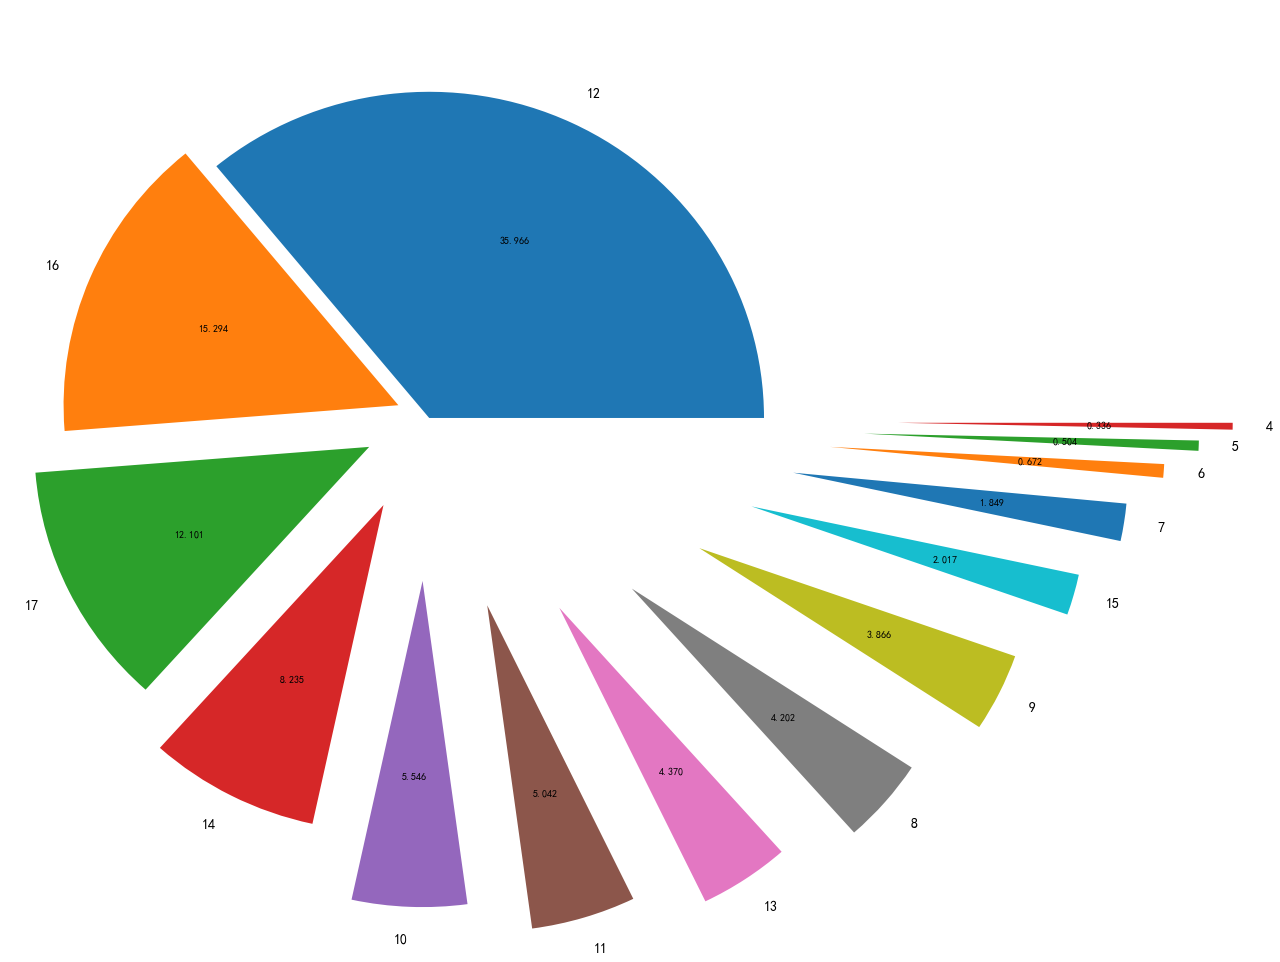

In [20]:
# 饼图查看教育年限 比例
labels= list(data['教育'].value_counts().index)
fracs = list(data['教育'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3,1.4] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

In [21]:
# 查看工资对数柱状图
salary = data['工资对数'].value_counts()
salary = salary.head(20)
salary

6.90575    179
6.90776     76
6.62007     74
6.55108     73
6.80239     64
6.68461     63
6.39693     62
6.21461     61
6.47697     56
7.13090     51
7.09008     51
6.95655     49
6.30992     46
6.74524     43
6.85646     43
7.00307     41
6.10925     37
6.77422     33
7.31322     32
6.43775     30
Name: 工资对数, dtype: int64

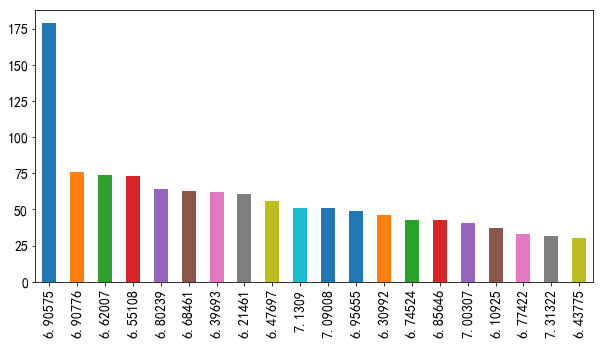

In [22]:
plt.figure(figsize=(10,5))
salary.plot.bar()
plt.show()

In [62]:
#下面我具体看下 黑人的 对应信息。
black = data.loc[data['黑人'] == 1]
black.head()

,全职工作经验,工作周,蓝领,制造业工作,住在南方,居住在标准的大都市统计区,已婚,性别,工会合同规定的个人工资,教育,黑人,工资对数
21,31,52,1,0,0,1,0,1,0,10,1,6.15698
22,32,46,1,0,0,1,0,1,0,10,1,6.23832
23,33,46,1,0,0,1,0,1,0,10,1,6.30079
24,34,49,1,0,0,1,0,1,0,10,1,6.35957
25,35,44,1,0,0,1,0,1,0,10,1,6.46925


In [28]:
black.sort_values('工资对数',ascending=False).head(5) # 黑人工资对数最高的五个信息（可以发现比不是黑人低了好多。8.53700）

,全职工作经验,工作周,蓝领,制造业工作,住在南方,居住在标准的大都市统计区,已婚,性别,工会合同规定的个人工资,教育,黑人,工资对数
1763,31,47,0,0,0,1,1,0,0,17,1,7.69621
1761,29,49,0,0,0,1,1,0,0,17,1,7.67322
1762,30,48,0,0,0,1,1,0,0,17,1,7.60090
1760,28,48,0,0,0,1,1,0,0,17,1,7.60090
1759,27,49,0,0,0,1,1,0,0,17,1,7.54961


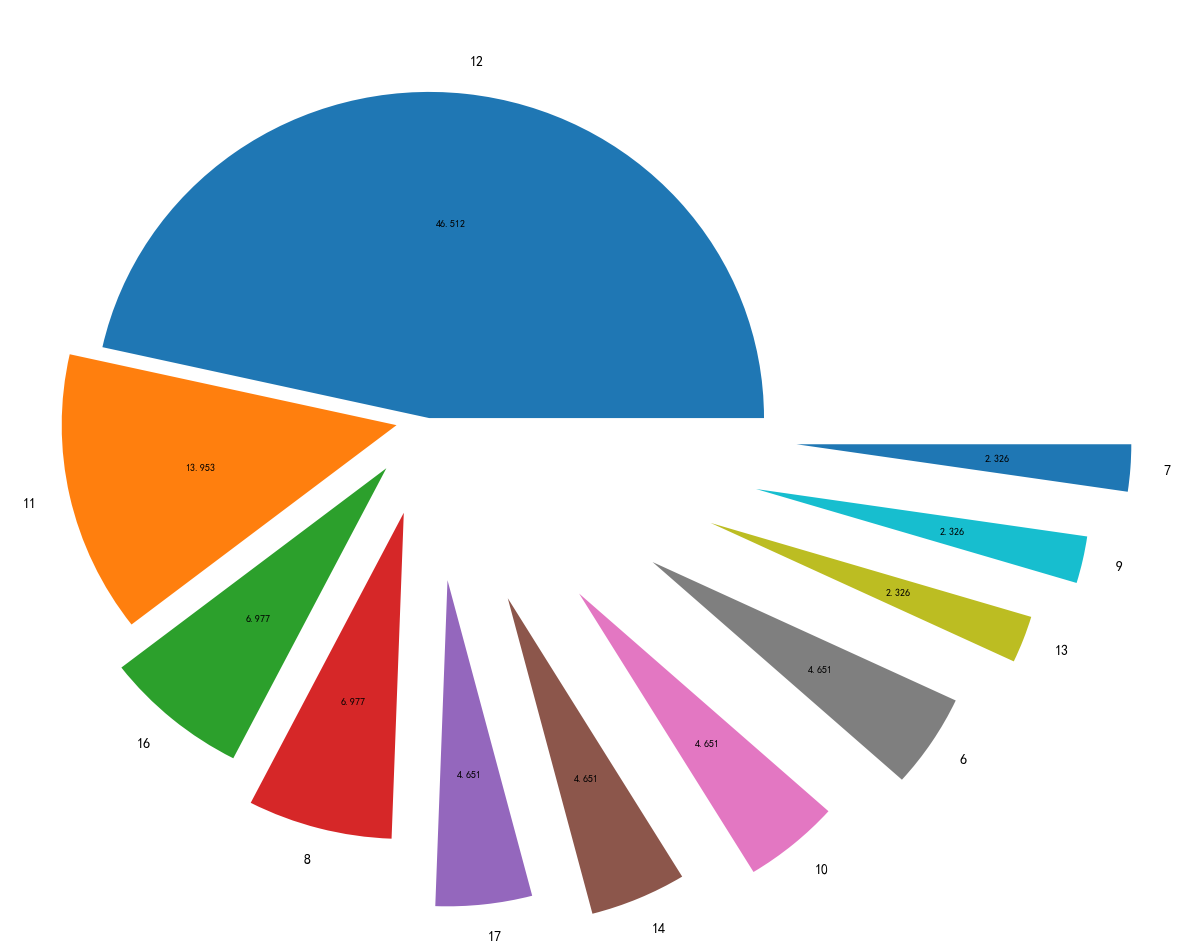

In [33]:
# 饼图查看黑人教育年限 比例
labels= list(black['教育'].value_counts().index)
fracs = list(black['教育'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

In [37]:
# 定义雷达图函数
def plotlinebar(dataType_list, data_sala, data_num):
    # dataType_list 横坐标轴， data_sala 特征下的平均薪水， data_num 数据在特征下分组的数量
    dataType_sala = []
    for i in range(len(dataType_list)):
        numa = list(data_sala[dataType_list[i]].index)
        numb = list(data_sala[dataType_list[i]].values)
        result = sum(np.multiply(np.array(numa), np.array(numb)))/sum(numb)
        dataType_sala.append(result)
    dataType_sala = np.array(dataType_sala)
    
    angles = np.linspace(0, 2*np.pi, len(dataType_list), endpoint=False)
    data = np.concatenate((dataType_sala, [dataType_sala[0]]))
    angles = np.concatenate((angles, [angles[0]]))
                            
    ax = plt.figure(figsize=(10, 10)).add_subplot(111, polar=True)
    ax.plot(angles, data, 'bo-', linewidth=2)
    ax.fill(angles, data, facecolor='r', alpha=0.3)
    ax.set_thetagrids(angles*180/np.pi, dataType_list)    
    plt.show()


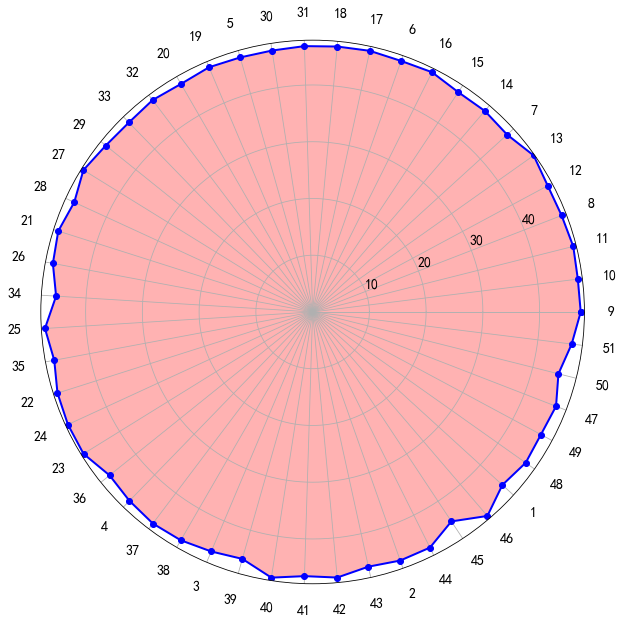

In [41]:
# 所属行业与薪水关系
indcateType_list = list(data['全职工作经验'].value_counts().index)
indcate_sala = data['工作周'].astype(np.int64).groupby(data['全职工作经验']).value_counts()
indcate_num = list(data['全职工作经验'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


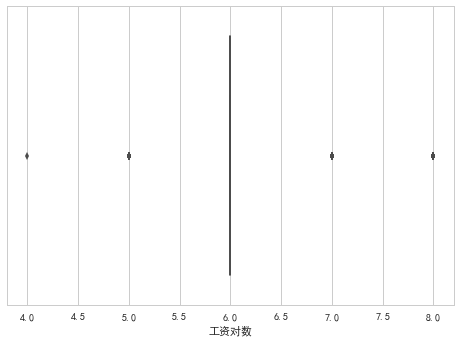

In [53]:
import seaborn as sns
sns.boxplot(x =data['工资对数'].astype(np.int64),saturation=2.75,whis=50)
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


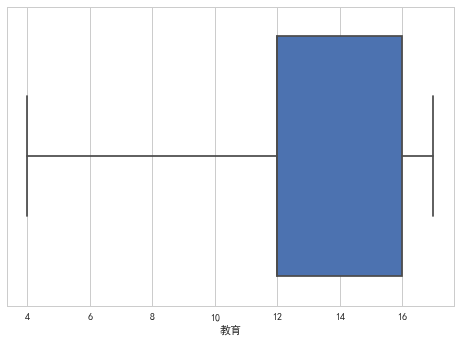

In [54]:
sns.boxplot(x =data['教育'].astype(np.int64),saturation=0.75,whis=3)
plt.show()

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


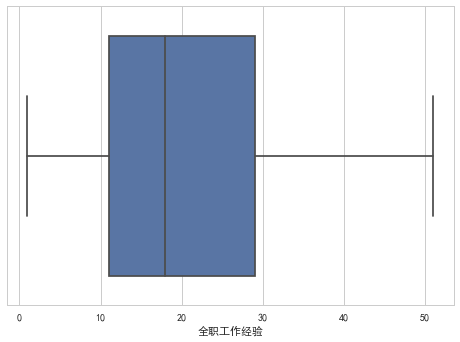

In [55]:
sns.boxplot(x =data['全职工作经验'].astype(np.int64),saturation=0.75,whis=3)
plt.show()

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


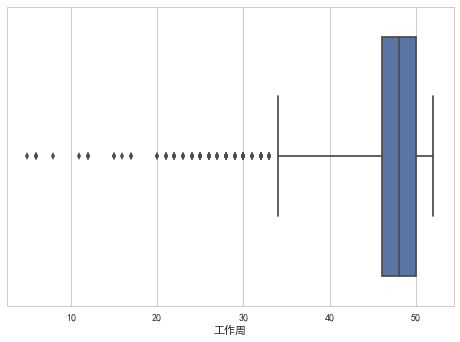

In [56]:
sns.boxplot(x =data['工作周'].astype(np.int64),saturation=0.75,whis=3)
plt.show()

In [66]:
print(1+1)

2


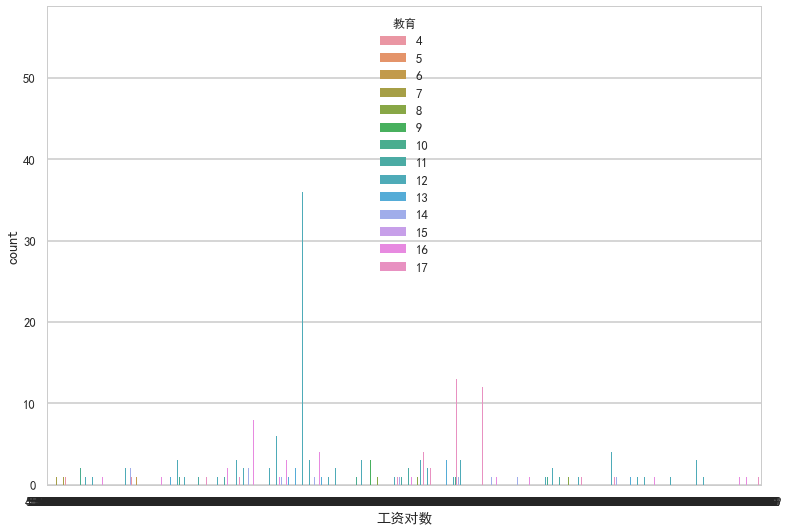

In [69]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'

sns.set_style(style="whitegrid")
#set_context()可以设置字体，字号
#context = "paper,poster,notebook,talk" ,字体
#font_scale = 0.8  字号
sns.set_context(context="poster",font_scale=0.8)
'''进入matplotlib的官网的colormaps选择自己喜欢的颜色，如"bwr"天蓝
https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py
sns.set_palette("bwr")
'''
'''进入seaborn的color颜色块，调用的时候是数组，所以一定在调用的时候加上数组[]符号。
http://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
'''
#选择颜色sns.color_palette("RdBu", n_colors=7)表示数组
sns.set_palette(sns.color_palette("RdBu", n_colors=7))
#柱状图的绘制，hue参数，表示在x的基础上，绘制更多的柱图
sns.countplot(x="工资对数",hue="教育",data=data)
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

In [68]:
print(1+1)

2
